import requests
import pandas as pd
import numpy as np
import csv
import numpy as np
import pandas as pd
# Show floats with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('NOR_CD_report_final.csv')
data.head()

,BG_treated,BG_untreated,BG_sham,BW_treated,BW_untreated,BW_sham,RI_NO(treated_Baseline),RI_NO (untreated_Baseline),RI_NO (sham_Baseline),RI_NO(sham_34W),...,CD_CZ(treated_Baseline),CD_CA(treated_34W),CD_OA(treated_34W),CD_CZ(treated_34W),CD_CA (Sham_Baseline),CD_OA (Sham_Baseline),CD_CZ(Sham_Baseline),CD_CA(Sham_34W),CD_OA(Sham_34W),CD_CZ(Sham_34W)
0,375,284,302.00,455,535,515.00,0.58,0.63,0.85,0.55,...,76.88,218.40,56.00,23.08,231.20,28.40,37.08,165.40,51.80,75.80
1,311,353,337.00,473,551,533.00,0.60,0.75,0.64,0.63,...,36.36,280.70,6.60,11.60,236.50,0.20,58.76,89.00,122.90,82.12
2,359,335,291.00,540,433,400.00,0.66,0.59,0.75,0.72,...,18.52,47.20,1.10,12.68,225.20,29.80,42.64,240.90,9.50,46.92
3,420,320,327.00,375,436,567.00,0.93,0.56,0.50,0.74,...,19.64,95.40,99.20,100.20,226.90,9.80,58.76,232.40,43.80,18.84
4,327,500,402.00,369,415,402.00,0.85,0.05,0.68,0.36,...,31.44,196.80,57.30,35.36,132.90,73.20,86.20,169.40,86.20,39.76


In [4]:
data.isna().sum()

BG_treated                    0
BG_untreated                  0
BG_sham                       2
BW_treated                    0
BW_untreated                  0
BW_sham                       2
RI_NO(treated_Baseline)       0
RI_NO (untreated_Baseline)    0
RI_NO (sham_Baseline)         2
RI_NO(sham_34W)               2
RI_NO (untreated_34W)         0
RI_NO(treated_34W)            0
CD_CA (untreated_Baseline)    0
CD_OA (untreated_Baseline)    0
CD_CZ(untreated_Baseline)     0
CD_CA(untreated_34W)          0
CD_OA(untreated_34W)          0
CD_CZ(untreated_34W)          0
CD_CA (treated_Baseline)      0
CD_OA (treated_Baseline)      0
CD_CZ(treated_Baseline)       0
CD_CA(treated_34W)            0
CD_OA(treated_34W)            0
CD_CZ(treated_34W)            0
CD_CA (Sham_Baseline)         2
CD_OA (Sham_Baseline)         2
CD_CZ(Sham_Baseline)          2
CD_CA(Sham_34W)               2
CD_OA(Sham_34W)               2
CD_CZ(Sham_34W)               2
dtype: int64

In [5]:
clean_data= data.dropna()
clean_data.head()

,BG_treated,BG_untreated,BG_sham,BW_treated,BW_untreated,BW_sham,RI_NO(treated_Baseline),RI_NO (untreated_Baseline),RI_NO (sham_Baseline),RI_NO(sham_34W),...,CD_CZ(treated_Baseline),CD_CA(treated_34W),CD_OA(treated_34W),CD_CZ(treated_34W),CD_CA (Sham_Baseline),CD_OA (Sham_Baseline),CD_CZ(Sham_Baseline),CD_CA(Sham_34W),CD_OA(Sham_34W),CD_CZ(Sham_34W)
0,375,284,302.00,455,535,515.00,0.58,0.63,0.85,0.55,...,76.88,218.40,56.00,23.08,231.20,28.40,37.08,165.40,51.80,75.80
1,311,353,337.00,473,551,533.00,0.60,0.75,0.64,0.63,...,36.36,280.70,6.60,11.60,236.50,0.20,58.76,89.00,122.90,82.12
2,359,335,291.00,540,433,400.00,0.66,0.59,0.75,0.72,...,18.52,47.20,1.10,12.68,225.20,29.80,42.64,240.90,9.50,46.92
3,420,320,327.00,375,436,567.00,0.93,0.56,0.50,0.74,...,19.64,95.40,99.20,100.20,226.90,9.80,58.76,232.40,43.80,18.84
4,327,500,402.00,369,415,402.00,0.85,0.05,0.68,0.36,...,31.44,196.80,57.30,35.36,132.90,73.20,86.20,169.40,86.20,39.76


In [6]:
df= data[['RI_NO(treated_Baseline)','RI_NO (untreated_Baseline)','RI_NO (sham_Baseline)','RI_NO(sham_34W)','RI_NO(treated_34W)','RI_NO (untreated_34W)','CD_CZ(treated_Baseline)','CD_CA (untreated_Baseline)','CD_CZ(untreated_Baseline)','CD_CA(untreated_34W)','CD_OA(untreated_34W)','CD_CZ(untreated_34W)', 'CD_CA (treated_Baseline)','CD_OA (treated_Baseline)','CD_CZ(treated_Baseline)','CD_CA(treated_34W)','CD_OA(treated_34W)','CD_CZ(treated_34W)',
'CD_CA (Sham_Baseline)',
'CD_OA (Sham_Baseline)',
'CD_CZ(Sham_Baseline)',
'CD_CA(Sham_34W)','CD_OA(Sham_34W)',
'CD_CZ(Sham_34W)']]

In [7]:
df_corr = df.corr(numeric_only=True)

<Axes: >

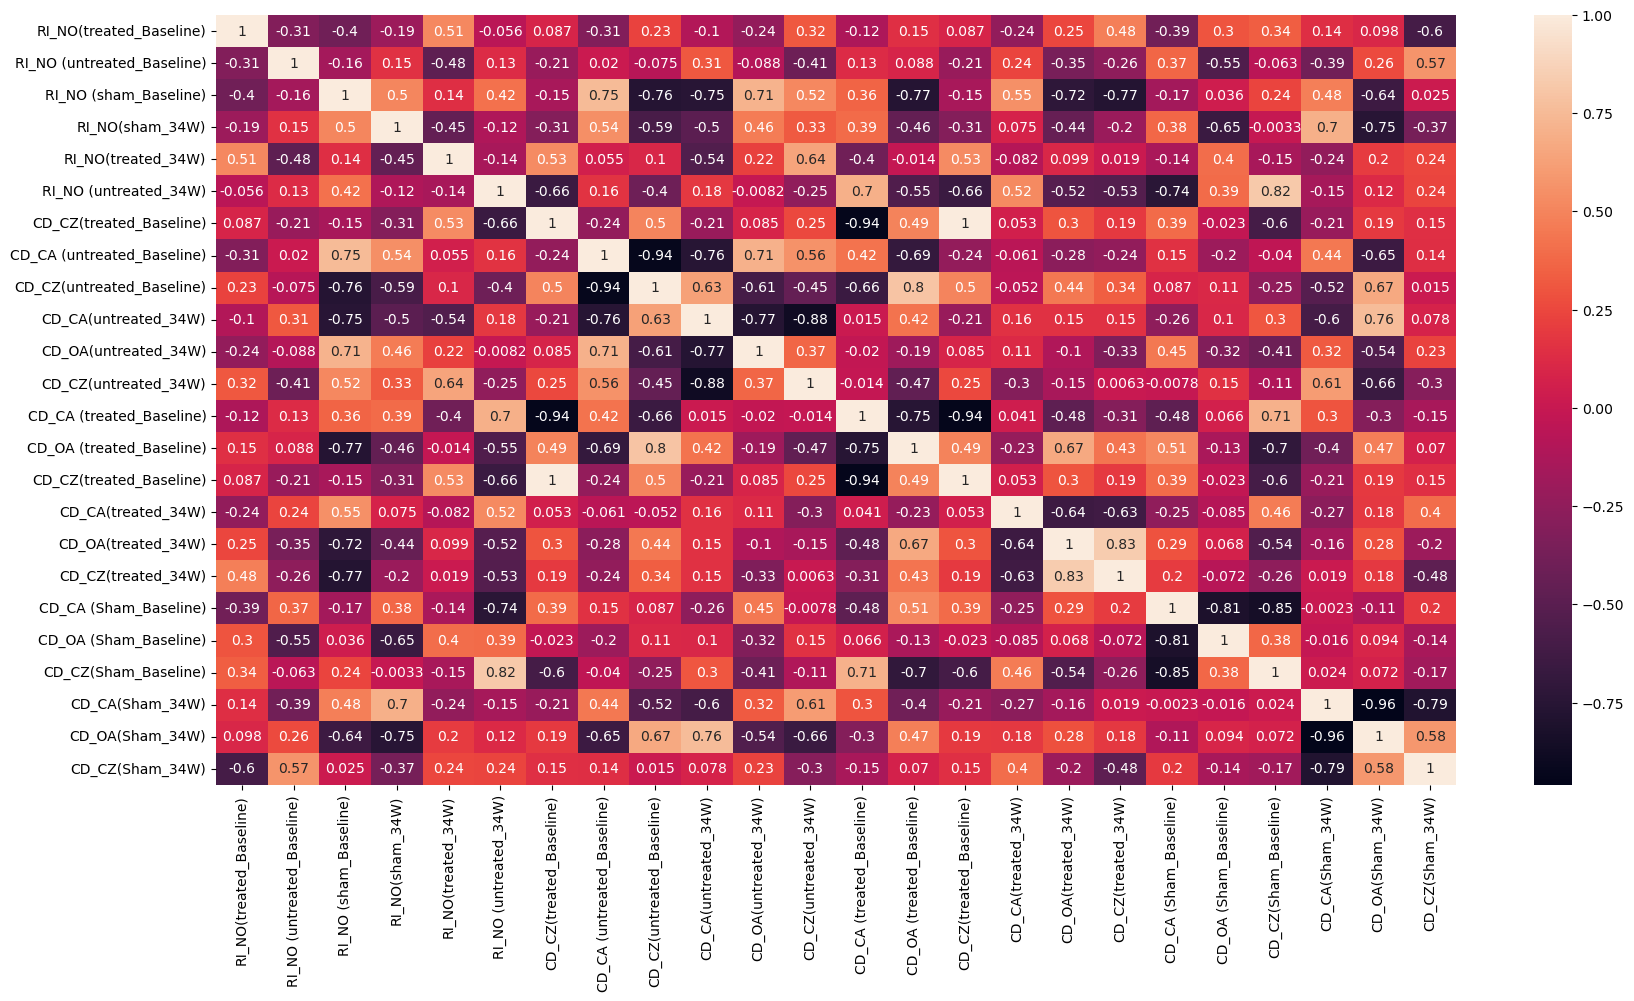

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True)

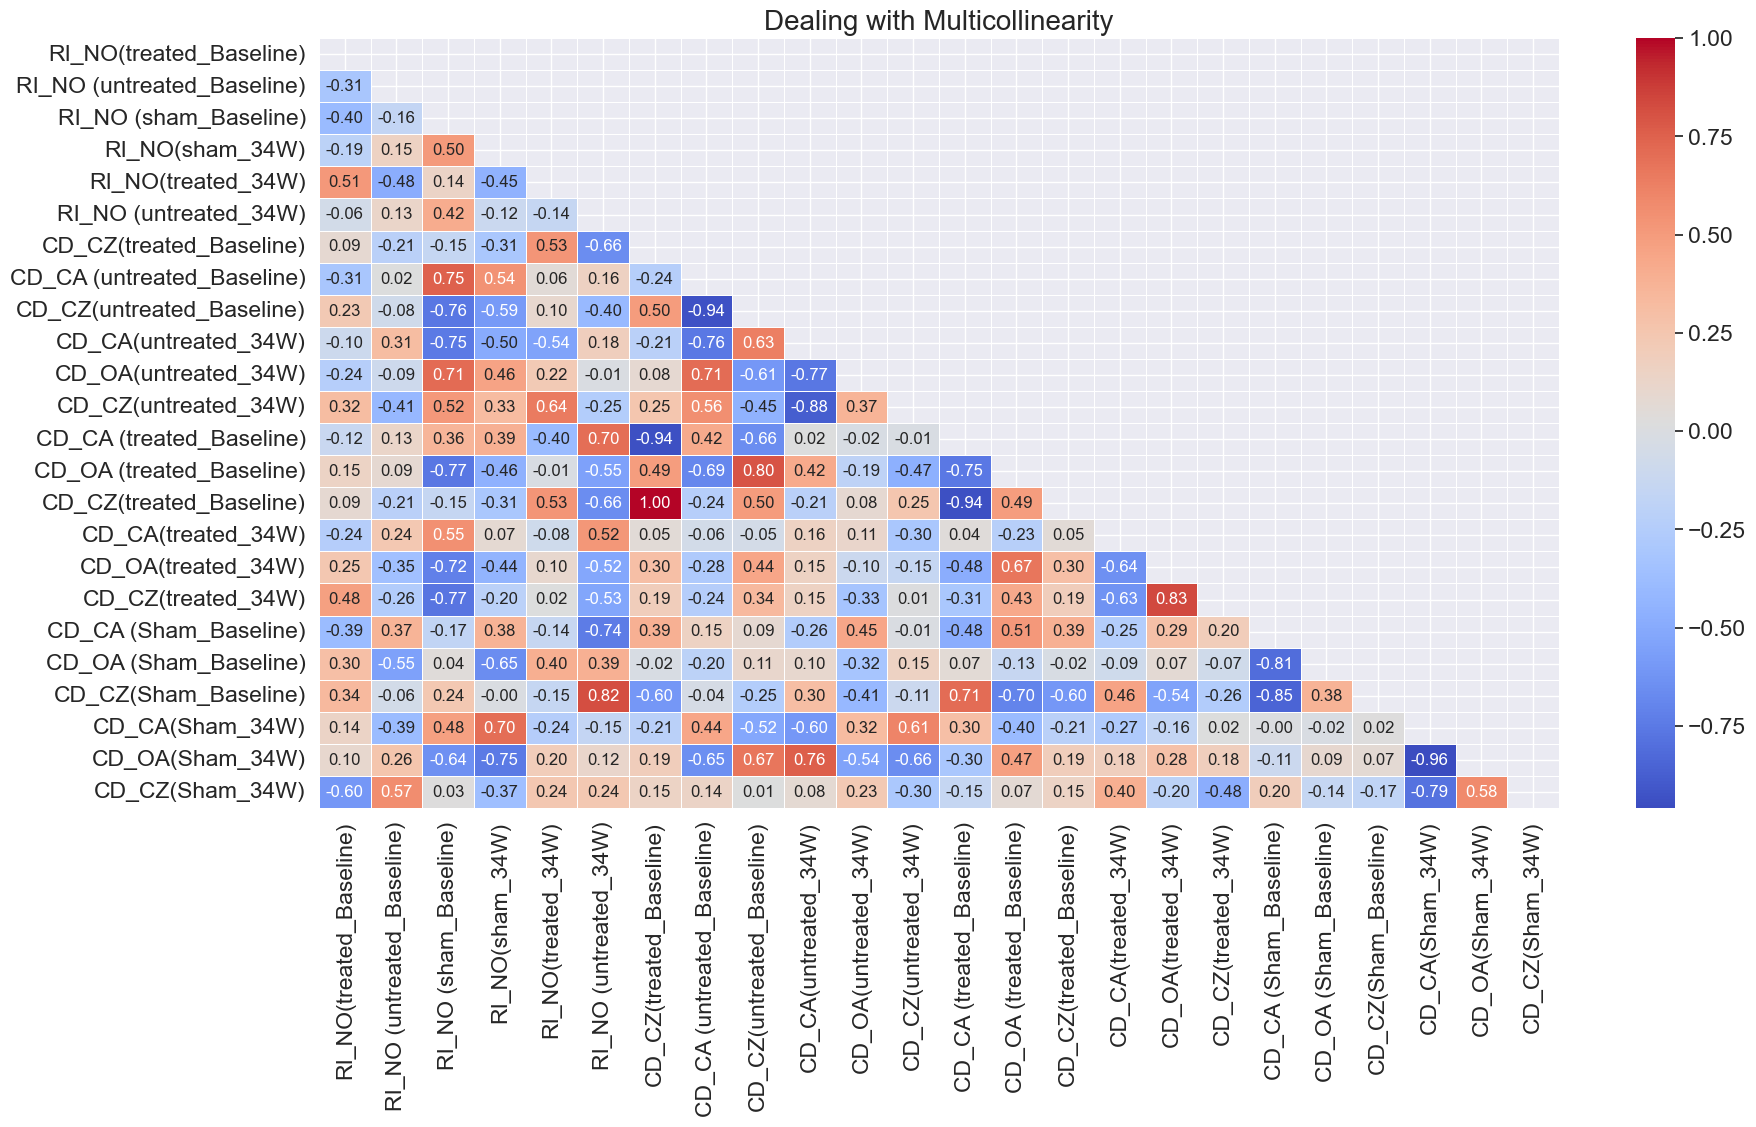

In [11]:
import plotly.express as px
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True # to hide half of the matrix
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

In [19]:
df= df.drop('CD_CA(Sham_34W)', axis=1)

In [20]:
df.isna().sum()

RI_NO(treated_Baseline)       0
RI_NO (untreated_Baseline)    0
RI_NO (sham_Baseline)         2
RI_NO(sham_34W)               2
RI_NO(treated_34W)            0
RI_NO (untreated_34W)         0
CD_CZ(treated_Baseline)       0
CD_CA (untreated_Baseline)    0
CD_CZ(untreated_Baseline)     0
CD_CA(untreated_34W)          0
CD_OA(untreated_34W)          0
CD_CZ(untreated_34W)          0
CD_CA (treated_Baseline)      0
CD_OA (treated_Baseline)      0
CD_CZ(treated_Baseline)       0
CD_CA(treated_34W)            0
CD_OA(treated_34W)            0
CD_CZ(treated_34W)            0
CD_CA (Sham_Baseline)         2
CD_OA (Sham_Baseline)         2
CD_CZ(Sham_Baseline)          2
CD_OA(Sham_34W)               2
CD_CZ(Sham_34W)               2
dtype: int64

In [56]:
df_cleaned= data[['RI_NO(treated_Baseline)','RI_NO (untreated_Baseline)','RI_NO(treated_34W)','RI_NO (untreated_34W)','CD_CZ(treated_Baseline)','CD_CA (untreated_Baseline)','CD_CZ(untreated_Baseline)','CD_CA(untreated_34W)','CD_OA(untreated_34W)','CD_CZ(untreated_34W)', 'CD_CA (treated_Baseline)','CD_OA (treated_Baseline)','CD_CZ(treated_Baseline)','CD_CA(treated_34W)','CD_OA(treated_34W)','CD_CZ(treated_34W)']]


In [57]:
df_cleaned.isna().sum()

RI_NO(treated_Baseline)       0
RI_NO (untreated_Baseline)    0
RI_NO(treated_34W)            0
RI_NO (untreated_34W)         0
CD_CZ(treated_Baseline)       0
CD_CA (untreated_Baseline)    0
CD_CZ(untreated_Baseline)     0
CD_CA(untreated_34W)          0
CD_OA(untreated_34W)          0
CD_CZ(untreated_34W)          0
CD_CA (treated_Baseline)      0
CD_OA (treated_Baseline)      0
CD_CZ(treated_Baseline)       0
CD_CA(treated_34W)            0
CD_OA(treated_34W)            0
CD_CZ(treated_34W)            0
dtype: int64

In [58]:
from sklearn import linear_model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.metrics import r2_score

In [25]:
X = df_cleaned.drop('CD_OA(treated_34W)', axis=1)
y = df_cleaned['CD_OA(treated_34W)']

In [26]:
# Fit model
model = linear_model.LinearRegression()
result = model.fit(X, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 426.6797243084212
Coefficient: [ 0.40519961 -1.20929314  1.23088064  1.12506959 -2.71717152 -0.60179292
  0.1763695   5.20156773  5.70565439  4.66761023 -5.78392685 -6.49134544
 -2.71717152 -0.45219701  1.12459003]


In [27]:
# Check R2 score
result.score(X, y)

1.0